<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P5_02_notebookTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 5


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import time
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy

from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2csc


from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Bert
import os
os.environ["TF_KERAS"]='1'

In [ ]:
from sklearn import manifold
from sklearn.manifold import TSNE
from joblib import dump, load
from random import sample
from sklearn.metrics import jaccard_score

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
pip install transformers

     |████████████████████████████████| 3.8 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 4.2 MB/s 
     |████████████████████████████████| 895 kB 68.1 MB/s 
     |████████████████████████████████| 596 kB 57.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

In [359]:
import transformers
import random

In [ ]:
pip install pyLDAvis

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.0
2.8.0
Num GPUs Available:  0
True


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
df = pad.read_csv('data_projet5_clean.csv', sep='\t')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Body,Tags,Title,Title_Clean,Body_Clean,Tags_Clean,Title_and_Body_Clean
0,0,0,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,How to convert a Decimal to a Double in C#?,convert decimal double c #,want use < code > track-bar < /code > change <...,c# floating-point type-conversion double deci...,"convert, decimal, double, code, track, bar, co..."
1,1,1,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,Why did the width collapse in the percentage w...,width collapse percentage width child element ...,absolutely positioned < code > div < /code > c...,html css internet-explorer-7,"width, collapse, percentage, width, child, ele..."
2,2,2,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,How do I calculate someone's age based on a Da...,calculate someone age based datetime type birt...,given < code > datetime < /code > representing...,c# .net datetime,"calculate, age, base, represent, person, birth..."
3,3,3,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#,calculate relative time c #,given specific < code > datetime < /code > val...,c# datetime time datediff relative-time-span,"calculate, relative, time, give, specific, cod..."
4,4,4,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,Determine a user's timezone,determine user timezon,standard web server able determine user timezo...,html browser timezone user-agent timezone-off...,"determine, web, server, able, determine, timez..."
...,...,...,...,...,...,...,...,...,...
49752,49752,49995,<p>For a long time now C++ has been the domina...,<c#><mono><xna>,Viability of C#/.NET as the new standard game ...,viability c # /.net new standard game dev plat...,for long time c++ dominate game development la...,c# mono xna,"long, time, game, development, language, many,..."
49753,49753,49996,<p>I have a NavigationWindow which hosts a ser...,<wpf><animation><navigationwindow>,Is it possible to have an animation appear on ...,possible animation appear wpf navigationwindow,navigationwindow hosts series pages . for desi...,wpf animation navigationwindow,"possible, animation, appear, page, design, rea..."
49754,49754,49997,<p>I'm sure there's a simple explanation for t...,<apache-flex><flexbuilder>,Deploying Flex Projects Leveraging Imported We...,deploying flex projects leveraging imported we...,'m sure simple explanation n't much luck findi...,apache-flex flexbuilder,"deploy, flex, project, leverage, import, web, ..."
49755,49755,49998,<p>I need a way to compute the nth root of a l...,<python><math><nth-root>,How to compute the nth root of a very big integer,compute nth root big integ,need compute nth root long integer python . < ...,python math nth-root,"nth, root, compute, nth, root, long, try, long..."


# Modèle non-supervisé

## GENSIM

Préparation du corpus

In [356]:
data_words = load('data_words.joblib')

In [202]:
from pandas.core.common import random_state
data_words = sample(data_words,1000)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 6), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


Entrainement du modèle non-supervisé

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10, random_state=7, chunksize=100, passes=10, per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"address" + 0.025*"table" + 0.018*"row" + 0.015*"column" + '
  '0.013*"key" + 0.012*"datum" + 0.012*"write" + 0.012*"print" + 0.011*"would" '
  '+ 0.011*"size"'),
 (1,
  '0.019*"com" + 0.018*"application" + 0.015*"image" + 0.012*"input" + '
  '0.011*"sample" + 0.010*"request" + 0.009*"net" + 0.009*"send" + '
  '0.009*"domain" + 0.009*"use"'),
 (2,
  '0.029*"string" + 0.017*"code" + 0.016*"word" + 0.014*"report" + '
  '0.013*"stre" + 0.012*"text" + 0.012*"resource" + 0.012*"language" + '
  '0.011*"example" + 0.010*"system"'),
 (3,
  '0.039*"code" + 0.018*"would" + 0.017*"element" + 0.017*"child" + '
  '0.013*"view" + 0.012*"replace" + 0.012*"number" + 0.010*"source" + '
  '0.009*"controller" + 0.008*"style"'),
 (4,
  '0.019*"page" + 0.017*"web" + 0.015*"use" + 0.014*"tool" + 0.011*"problem" + '
  '0.010*"application" + 0.009*"server" + 0.009*"site" + 0.008*"service" + '
  '0.008*"database"'),
 (5,
  '0.074*"file" + 0.024*"server" + 0.019*"use" + 0.018*"build" + '
  '0.016*

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.29846972942292305


In [ ]:
nb_of_topics = [1,10,20,30,40,50,60,70,80,90,100]

In [ ]:
score = []
for n in nb_of_topics:
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=n, random_state=7, chunksize=100, passes=10, per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    score.append(coherence_lda)

In [ ]:
print(score)

[0.26535900643439, 0.29836063526923234, 0.337575008975642, 0.34473930484991205, 0.3674946194759955, 0.3788519363156784, 0.37068444443404225, 0.3686580796729679, 0.38870499545920795, 0.37799366179580063, 0.36800986133910035]


In [ ]:
# le code précédent est très long, donc je récupère les valeurs ci-dessous pour les avoir sans lancer le code à chaque fois
score = [0.26535900643439, 0.29836063526923234, 0.337575008975642, 0.34473930484991205, 0.3674946194759955, 0.3788519363156784, 0.37068444443404225, 0.3686580796729679, 0.38870499545920795, 0.37799366179580063, 0.36800986133910035]

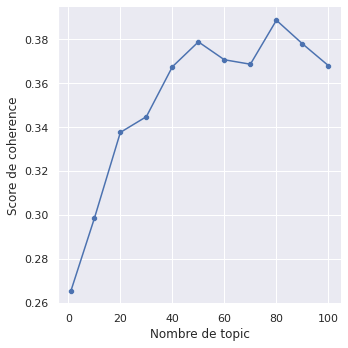

In [ ]:
sns.set_theme()
ax = sns.relplot(x=nb_of_topics, y=score, kind='line')
ax = sns.scatterplot(x=nb_of_topics, y=score)
ax.set_ylabel('Score de coherence')
ax.set_xlabel('Nombre de topic')
fig = ax.get_figure()
#fig.savefig("Coherence score fonction nb topic", dpi=400)

Avec 50 topics on semble être assez représentatif de nos données, car ensuite on obtient un plateau

In [184]:
#Sauvegarde du modèle optimisé
dump(lda_model, 'LDA_model.joblib')

['LDA_model.joblib']

In [185]:
#Chargement du modèle optimisé
lda_model = load('LDA_model.joblib')

### Visualisation des topics :

In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word, mds='mmds')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
48     0.176086  0.419858       1        1  3.992788
1      0.277653  0.131866       2        1  3.519647
10    -0.037017  0.394467       3        1  3.086014
41    -0.235916  0.397379       4        1  3.053147
46     0.415318 -0.119001       5        1  3.003591
20     0.406002  0.149181       6        1  2.976250
30     0.061937  0.419911       7        1  2.873036
6     -0.406360 -0.185504       8        1  2.815645
17    -0.328660  0.298975       9        1  2.802795
31     0.222110  0.340522      10        1  2.780541
21     0.331496  0.301731      11        1  2.772578
45    -0.114453  0.414265      12        1  2.767928
16    -0.355040  0.085504      13        1  2.681651
4     -0.191800  0.302782      14        1  2.573814
47     0.143329  0.013527      15        1  2.509634
34    -0.099648  0.220959      16        1  2.364950
7     -0.008900  0.170147      17        1  2.322649
14    -0.456758  0.037100      18        1  2.275747
49     0.017802  0.315400      19        1  2.246286
5      0.321884  0.226646      20        1  2.205302
15    -0.205833 -0.007740      21        1  2.130005
40     0.116865 -0.456461      22        1  2.102283
9      0.134868  0.159487      23        1  2.036313
24    -0.222842 -0.405472      24        1  2.034563
27    -0.435937 -0.071664      25        1  2.026094
18     0.231183 -0.013889      26        1  1.985497
12     0.304176 -0.091100      27        1  1.843410
2     -0.327540 -0.220251      28        1  1.776923
38     0.314570 -0.299823      29        1  1.768222
13    -0.010026  0.024742      30        1  1.682182
42    -0.280069 -0.298482      31        1  1.617116
0      0.206735 -0.264440      32        1  1.566494
22    -0.305361 -0.073025      33        1  1.542929
23     0.249301 -0.392369      34        1  1.535759
32     0.342856 -0.205419      35        1  1.521718
11     0.418847 -0.041659      36        1  1.494246
3      0.404708  0.044181      37        1  1.428996
37     0.015288 -0.145353      38        1  1.401920
39    -0.161918 -0.282783      39        1  1.327901
43    -0.106426 -0.434525      40        1  1.311064
44    -0.168973 -0.121122      41        1  1.280732
29    -0.383245  0.155548      42        1  1.280451
25     0.147162 -0.204023      43        1  1.224635
33     0.013801 -0.421132      44        1  1.076382
26     0.147129  0.245899      45        1  1.075792
8     -0.226989  0.093409      46        1  1.017022
28    -0.285428  0.183672      47        1  0.970197
35    -0.095533 -0.185620      48        1  0.896792
19    -0.034148 -0.307919      49        1  0.783472
36     0.063713 -0.298380      50        1  0.636902, topic_info=            Term        Freq       Total Category  logprob  loglift
1           file  450.000000  450.000000  Default  30.0000  30.0000
11          code  832.000000  832.000000  Default  29.0000  29.0000
29          name  233.000000  233.000000  Default  28.0000  28.0000
265       server  264.000000  264.000000  Default  27.0000  27.0000
146          web  201.000000  201.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
356         find    6.291748  185.667665  Topic50  -3.7980   1.6716
269        thank    3.489835   89.197434  Topic50  -4.3874   1.8153
1823  equivalent    2.028541   14.274355  Topic50  -4.9299   3.1052
2655        cell    1.840327   10.544036  Topic50  -5.0273   3.3107
184       wonder    1.888943   40.726852  Topic50  -5.0012   1.9854

[2504 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2326     24  0.909425   ability
0         2  0.076572      able
0         6  0.063810      able
0        14  0.025524      able
0        15  0.025524      able
...     ...       ...       ...
816      25  0.740845       yet
816      30  0.185211       yet
2002      4  0.960010      

Récupération des topics :

In [ ]:
top_topics = lda_model.top_topics(corpus)

In [ ]:
top_topics

[([(0.036293793, 'page'),
   (0.024366986, 'problem'),
   (0.021318402, 'control'),
   (0.020823054, 'first'),
   (0.016458562, 'use'),
   (0.015786625, 'run'),
   (0.014439821, 'net'),
   (0.012783482, 'time'),
   (0.012460834, 'seem'),
   (0.012280776, 'set'),
   (0.012268051, 'find'),
   (0.012179549, 'view'),
   (0.011324841, 'return'),
   (0.011073059, 'log'),
   (0.010964141, 'result'),
   (0.010277292, 'could'),
   (0.010136015, 'may'),
   (0.010127816, 'think'),
   (0.010122703, 'allow'),
   (0.00946887, 'ca')],
  -2.0575404695468147),
 ([(0.024778813, 'see'),
   (0.022344435, 'index'),
   (0.021238074, 'much'),
   (0.017944947, 'update'),
   (0.01765685, 'thing'),
   (0.0175483, 'come'),
   (0.017427966, 'width'),
   (0.016511487, 'think'),
   (0.015556417, 'easy'),
   (0.015550268, 'say'),
   (0.014997282, 'delete'),
   (0.014895319, 'however'),
   (0.014522123, 'wonder'),
   (0.014388779, 'interested'),
   (0.014071215, 'tell'),
   (0.013712761, 'idea'),
   (0.013702594, 'lo

Je filtre en ne gardant que les trois mots clés par topic ayant le plus de fréquence.

Ce qui me donne 50 topics * 3 mots clés = 150 mots clés

Je crée une dataframe avec les 3 mots clés les plus fréquent par topic

In [ ]:
list_of_keywords_01 = []
list_of_keywords_02 = []
list_of_keywords_03 = []
for elm in top_topics:
    list_of_keywords_01.append(elm[0][0][1])
    list_of_keywords_02.append(elm[0][1][1])
    list_of_keywords_03.append(elm[0][2][1])

In [ ]:
df_results_unsupervised = pad.DataFrame(index = np.arange(1,51), columns = ["Keyword_1", "Keyword_2", "Keyword_3"])

In [ ]:
df_results_unsupervised.index.names = ['n°_Topic']

In [ ]:
df_results_unsupervised["Keyword_1"] = list_of_keywords_01
df_results_unsupervised["Keyword_2"] = list_of_keywords_02
df_results_unsupervised["Keyword_3"] = list_of_keywords_03

In [ ]:
df_results_unsupervised

,Keyword_1,Keyword_2,Keyword_3
n°_Topic,,,
1,page,problem,control
2,see,index,much
3,code,string,return
4,function,message,open
5,name,code,query
6,com,question,stackoverflow
7,code,define,interface
8,process,bar,foo
9,application,net,use


### Prédiction des tags en fonction d'une nouvelle phrase :

In [376]:
random_data_words = random.choice(data_words)

In [383]:
def unsupervised_model_prediction_tag(sentence):
    new_corpus = [id2word.doc2bow(text) for text in [sentence]]
    proba = []
    for elm in lda_model.get_document_topics(new_corpus)[0]:
        proba.append(elm[1])

    top_topic_index = proba.index(max(proba))
    top_topic = lda_model.get_document_topics(new_corpus)[0][top_topic_index][0]
    print("Les mots clés les plus probables pour cette phrase sont : ")
    print(df_results_unsupervised.loc[top_topic].values)

In [384]:
unsupervised_model_prediction_tag(random_data_words)

Les mots clés les plus probables pour cette phrase sont : 
['feature' 'collection' 'hack']


On remarque que même si les résultats ne sont pas incongrus ile ne sont pas très bon, un modèle supervisé devrait faire mieux

# Modèle supervisé

## Préparation des données

In [ ]:
df_Title_Body = df.sample(n=10000, random_state=7)

In [ ]:
#df_Title_Body = df

In [ ]:
df_Title_Body["Title_and_Body_Clean"] = df_Title_Body["Title_Clean"] + df_Title_Body["Body_Clean"]

Préparation du dataset "Tags"

In [ ]:
all_tags = {}
for index, row in df_Title_Body['Tags_Clean'].iteritems():
    for tag in row.split():
        all_tags[tag] = all_tags.get(tag, 0) + 1
        
print("Nombre de tags:", len(all_tags))

Nombre de tags: 4286


In [ ]:
# Je les mets par fréquence d'apparitin
tags_sorted = sorted(all_tags.items(), key=lambda x: x[1], reverse=True)

In [ ]:
tags_sorted

[('c#', 1264),
 ('.net', 1033),
 ('java', 756),
 ('asp.net', 670),
 ('c++', 583),
 ('javascript', 467),
 ('sql-server', 386),
 ('php', 376),
 ('sql', 352),
 ('python', 329),
 ('windows', 282),
 ('visual-studio', 249),
 ('html', 248),
 ('c', 220),
 ('database', 199),
 ('mysql', 180),
 ('css', 169),
 ('ruby', 166),
 ('winforms', 164),
 ('vb.net', 163),
 ('jquery', 159),
 ('asp.net-mvc', 158),
 ('xml', 157),
 ('linux', 149),
 ('performance', 146),
 ('wpf', 144),
 ('svn', 139),
 ('visual-studio-2008', 136),
 ('ruby-on-rails', 136),
 ('web-services', 124),
 ('language-agnostic', 123),
 ('unit-testing', 119),
 ('multithreading', 110),
 ('winapi', 110),
 ('regex', 110),
 ('user-interface', 106),
 ('algorithm', 104),
 ('ajax', 103),
 ('oop', 100),
 ('linq', 100),
 ('sql-server-2005', 100),
 ('perl', 98),
 ('security', 98),
 ('oracle', 97),
 ('version-control', 96),
 ('string', 95),
 ('flash', 92),
 ('iphone', 92),
 ('debugging', 90),
 ('delphi', 89),
 ('sharepoint', 85),
 ('excel', 84),
 ('apa

In [ ]:
n_selec_tags = 50 # Top N words

print("tags les plus présents:")
for tag, count in tags_sorted[:n_selec_tags]:
    print(f"{tag:15} {count:5}") # Params correspond to spacing

tags les plus présents:
c#               1264
.net             1033
java              756
asp.net           670
c++               583
javascript        467
sql-server        386
php               376
sql               352
python            329
windows           282
visual-studio     249
html              248
c                 220
database          199
mysql             180
css               169
ruby              166
winforms          164
vb.net            163
jquery            159
asp.net-mvc       158
xml               157
linux             149
performance       146
wpf               144
svn               139
visual-studio-2008   136
ruby-on-rails     136
web-services      124
language-agnostic   123
unit-testing      119
multithreading    110
winapi            110
regex             110
user-interface    106
algorithm         104
ajax              103
oop               100
linq              100
sql-server-2005   100
perl               98
security           98
oracle             97
ver

ça me donne 50 tags qui apparaissent de 1264 à 89 fois

In [ ]:
n_selec_tags = 50
# Select only desired tags
selected_tags = [tag for tag, count in tags_sorted[:n_selec_tags]]

copy_tags = df_Title_Body['Tags_Clean'].copy()

for index, row in df_Title_Body['Tags_Clean'].iteritems():
    copy_tags[index] = [tag for tag in row.split() if tag in selected_tags]
    
mask = (copy_tags.apply(len) > 0)
df_Title_Body['Tags'] = copy_tags
df_Title_Body['Document'] = df_Title_Body["Title_and_Body_Clean"]

corpus = df_Title_Body.loc[mask, ['Document', 'Tags']]
corpus.sample(10)

,Document,Tags
43816,.net databinding ignores property changwritten...,[c#]
10813,auto-indent spaces c vim've somewhat spoiled u...,[c]
4762,flex .net good get data flex weborb web servi...,[.net]
27810,.net webservice access ...note consuming webs...,"[.net, web-services]"
22315,test data builder pattern useful upkeeplet sta...,"[.net, unit-testing]"
16957,deploy complex sql solutions instalpart setup ...,"[sql, database]"
18237,obtaining requestdispatchbenefit using servlet...,[java]
18321,c # network loginperform network login access ...,[c#]
8096,automated testing flex based appltools prefera...,[web-services]
29373,restricting access objects applone problem com...,"[.net, security]"


In [ ]:
df_Title_Body.to_csv('data_projet5_ready_for_sup_model.csv', sep='\t', index=True)

In [ ]:
df_Title_Body = pad.read_csv('data_projet5_ready_for_sup_model.csv', sep='\t')

Split des données en train et test dataset

In [ ]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_Title_Body['Document'], df_Title_Body['Tags'], train_size=0.75, test_size=0.25,  random_state=7)

In [ ]:
dictionary = [d.split() for d in df_Title_Body['Document']]
dictionary = Dictionary(dictionary)

Transformation des deux datasets

In [ ]:
binarizer = MultiLabelBinarizer()

In [ ]:
Y_train_bin = binarizer.fit_transform(Y_train)
Y_test_bin = binarizer.transform(Y_test)

## Extraction des features

### Bag-Of-Words

In [ ]:
n_terms = len(dictionary)

In [ ]:
list_X_train = [d.split() for d in X_train] 

In [ ]:
X_train_bow = [dictionary.doc2bow(doc, allow_update=False) for doc in list_X_train]

In [ ]:
list_X_test = [d.split() for d in X_test] 

In [ ]:
X_test_bow = [dictionary.doc2bow(doc, allow_update=False) for doc in list_X_test]

In [ ]:
X_train_Sparse = corpus2csc(X_train_bow, num_terms=n_terms).transpose()
X_test_Sparse = corpus2csc(X_test_bow, num_terms=n_terms).transpose()

In [ ]:
X_test_Sparse

<2500x73608 sparse matrix of type '<class 'numpy.float64'>'
	with 144141 stored elements in Compressed Sparse Row format>

## Execution des modèles et évaluations

### Naive Bayes | TF-IDF

In [ ]:
hyperparameters = {'nb__estimator__alpha': [0.03, 0.025, 0.02, 0.0175, 0.01, 0.05]}
estimator_nb = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), ('nb', OneVsRestClassifier(MultinomialNB()))])
grid_nb = GridSearchCV(estimator_nb, hyperparameters, scoring='f1_micro', cv=5 ,verbose=1)

In [ ]:
grid_nb.fit(X_train_Sparse, Y_train_bin)

In [ ]:
print(grid_nb.best_params_)
# return {'nb__estimator__alpha': 0.02}

{'nb__estimator__alpha': 0.025}


In [ ]:
model_nb = grid_nb.best_estimator_

In [ ]:
prediction = model_nb.predict(X_test_Sparse)
print('Accuracy:', accuracy_score(Y_test_bin, prediction))
print('F1 score:', f1_score(Y_test_bin, prediction, average='micro'))
print('Recall:', recall_score(Y_test_bin, prediction, average='micro'))
print('Precision:', precision_score(Y_test_bin, prediction, average='micro'))
print('Jaccard score:', jaccard_score(Y_test_bin, prediction, average='micro'))

Accuracy: 0.0792
F1 score: 0.6482374066723371
Recall: 0.6288621985880627
Precision: 0.6688444661140907
Jaccard score: 0.4795497448087814


In [ ]:
#Sauvegarde du modèle optimisé
dump(model_nb, 'Naive_Bayes_model.joblib')

['Naive_Bayes_model.joblib']

In [ ]:
#Chargement du modèle optimisé
model_nb = load('Naive_Bayes_model.joblib')

### SVM | TF-IDF

In [ ]:
hyperparameters = {'svm__estimator__C': [1, 1.2, 1.3, 1.4, 1.5]}
estimator_svm = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), ('svm', OneVsRestClassifier(LinearSVC(max_iter=10000)))])
grid_svm = GridSearchCV(estimator_svm, hyperparameters, scoring='f1_micro', cv=5,verbose=1)

In [ ]:
grid_svm.fit(X_train_Sparse, Y_train_bin)

In [ ]:
print(grid_svm.best_params_)
# return {'svm__estimator__C': 1}

{'svm__estimator__C': 1.5}


In [ ]:
model_svm = grid_svm.best_estimator_

In [ ]:
prediction = model_svm.predict(X_test_Sparse)
print('Accuracy:', accuracy_score(Y_test_bin, prediction))
print('F1 score:', f1_score(Y_test_bin, prediction, average='micro'))
print('Recall:', recall_score(Y_test_bin, prediction, average='micro'))
print('Precision:', precision_score(Y_test_bin, prediction, average='micro'))
print('Jaccard score:', jaccard_score(Y_test_bin, prediction, average='micro'))

Accuracy: 0.1552
F1 score: 0.7278706914134204
Recall: 0.6543962592830292
Precision: 0.8199310740953475
Jaccard score: 0.5721672211311074


In [ ]:
#Sauvegarde du modèle optimisé
dump(model_svm, 'SVM_model.joblib')

['SVM_model.joblib']

In [ ]:
#Chargement du modèle optimisé
model_svm = load('SVM_model.joblib')

### Random Forest | TF-IDF

In [ ]:
hyperparameters = {'rf__n_estimators': [25, 30, 31, 35], 'rf__criterion': ['gini', 'entropy']}
estimator_rf = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), ('rf', RandomForestClassifier())])
grid_rf = GridSearchCV(estimator_rf, hyperparameters, scoring='f1_micro', cv=5,verbose=1)

In [ ]:
grid_rf.fit(X_train_Sparse, Y_train_bin)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__n_estimators': [25, 30, 31, 35]},
             scoring='f1_micro', verbose=1)

In [ ]:
print(grid_rf.best_params_)
# return {'rf__criterion': 'gini', 'rf__n_estimators': 31}

{'rf__criterion': 'gini', 'rf__n_estimators': 25}


In [ ]:
model_rf = grid_rf.best_estimator_

In [ ]:
prediction = model_rf.predict(X_test_Sparse)
print('Accuracy:', accuracy_score(Y_test_bin, prediction))
print('F1 score:', f1_score(Y_test_bin, prediction, average='micro'))
print('Recall:', recall_score(Y_test_bin, prediction, average='micro'))
print('Precision:', precision_score(Y_test_bin, prediction, average='micro'))
print('Jaccard score:', jaccard_score(Y_test_bin, prediction, average='micro'))

Accuracy: 0.1432
F1 score: 0.6178881461540788
Recall: 0.4682314110204456
Precision: 0.90815328532053
Jaccard score: 0.4470608832669497


In [ ]:
#Sauvegarde du modèle optimisé
dump(model_rf, 'RandomForest_model.joblib')

['RandomForest_model.joblib']

In [ ]:
#Chargement du modèle optimisé
model_rf = load('RandomForest_model.joblib')

In [ ]:
def run_model_and_performance_check(model_class):

  # Prédiction du modèle et archivage des résultats
  y_pred = model_class.predict(X_test_Sparse)
 
  # Création des dataframes résultats
  results_classification = np.array([accuracy_score(Y_test_bin, y_pred), f1_score(Y_test_bin, y_pred, average='micro'), recall_score(Y_test_bin, y_pred, average='micro'), precision_score(Y_test_bin, y_pred, average='micro'), jaccard_score(Y_test_bin, y_pred, average='micro')])
  df_results = pad.DataFrame(index = ["Accuracy", "F1 score", "Recall", "Precision", "Jaccard score"], columns = [str(model_class)])
  df_results[str(model_class)] = results_classification

  return df_results

In [ ]:
df_results = pad.DataFrame(index = ["Accuracy", "F1 score", "Recall", "Precision", "Jaccard score"])

In [ ]:
df_results['Naive_Bayes'] = run_model_and_performance_check(model_nb)

In [ ]:
df_results['SVM'] = run_model_and_performance_check(model_svm)

In [ ]:
df_results['RandomForest'] = run_model_and_performance_check(model_rf)

In [ ]:
df_results

,Naive_Bayes,SVM,RandomForest
Accuracy,0.079200,0.155200,0.143200
F1 score,0.648237,0.727871,0.617888
Recall,0.628862,0.654396,0.468231
Precision,0.668844,0.819931,0.908153
Jaccard score,0.479550,0.572167,0.447061


In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

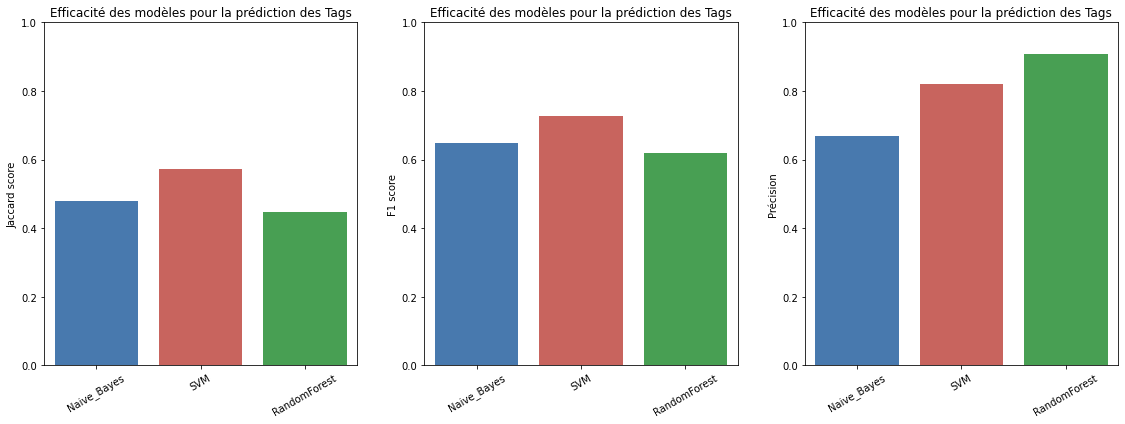

In [ ]:
df_graph = df_results.transpose()
fig, axs = plt.subplots(1, 3, figsize=(16, 6))
ax0 = sns.barplot(x=df_graph.index, y=df_graph["Jaccard score"].values, data=df_graph, ax=axs[0], palette = custom_palette)
ax1 = sns.barplot(x=df_graph.index, y=df_graph["F1 score"].values, data=df_graph, ax=axs[1], palette = custom_palette)
ax2 = sns.barplot(x=df_graph.index, y=df_graph["Precision"].values, data=df_graph, ax=axs[2], palette = custom_palette)
ax0.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax0.set_title('Efficacité des modèles pour la prédiction des Tags')
ax0.set_ylabel('Jaccard score')
ax0.set(ylim=(0, 1))
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax1.set_title('Efficacité des modèles pour la prédiction des Tags')
ax1.set_ylabel('F1 score')
ax1.set(ylim=(0, 1))
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)
ax2.set_title('Efficacité des modèles pour la prédiction des Tags')
ax2.set_ylabel('Précision')
ax2.set(ylim=(0, 1))

plt.tight_layout()
#fig.savefig("Performance modèles BOW", dpi=400)

Confusion matrix pour quelques post d'exemple

In [ ]:
y_pred_nb = model_nb.predict(X_test_Sparse)
y_pred_svm = model_svm.predict(X_test_Sparse)
y_pred_rf = model_rf.predict(X_test_Sparse)

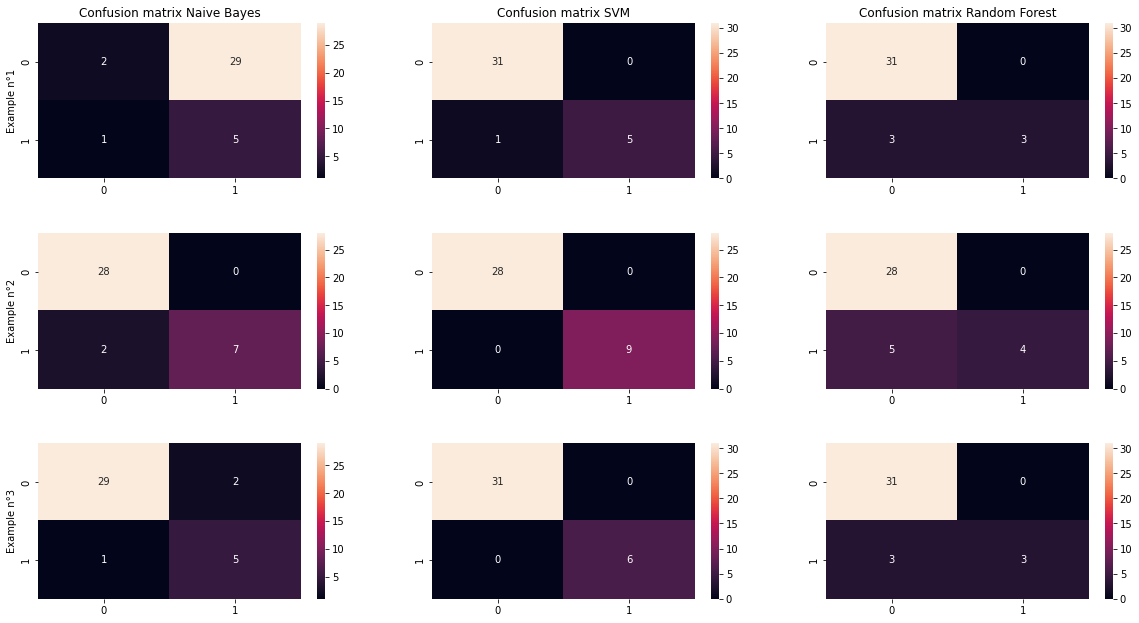

In [183]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

conf_matrix_NB_01 = tf.math.confusion_matrix(labels=Y_test_bin[0], predictions=y_pred_nb[0])
conf_matrix_NB_02 = tf.math.confusion_matrix(labels=Y_test_bin[100], predictions=y_pred_nb[100])
conf_matrix_NB_03 = tf.math.confusion_matrix(labels=Y_test_bin[1000], predictions=y_pred_nb[1000])

conf_matrix_SVM_01 = tf.math.confusion_matrix(labels=Y_test_bin[0], predictions=y_pred_svm[0])
conf_matrix_SVM_02 = tf.math.confusion_matrix(labels=Y_test_bin[100], predictions=y_pred_svm[100])
conf_matrix_SVM_03 = tf.math.confusion_matrix(labels=Y_test_bin[1000], predictions=y_pred_svm[1000])

conf_matrix_RF_01 = tf.math.confusion_matrix(labels=Y_test_bin[0], predictions=y_pred_rf[0])
conf_matrix_RF_02 = tf.math.confusion_matrix(labels=Y_test_bin[100], predictions=y_pred_rf[100])
conf_matrix_RF_03 = tf.math.confusion_matrix(labels=Y_test_bin[1000], predictions=y_pred_rf[1000])

ax_nb_01 = sns.heatmap(conf_matrix_NB_01, annot = True, fmt='d', ax=axs[0,0])
ax_nb_01.set_title('Confusion matrix Naive Bayes')
ax_nb_01.set_ylabel('Example n°1')
ax_svm_01 = sns.heatmap(conf_matrix_SVM_01, annot = True, fmt='d', ax=axs[0,1])
ax_svm_01.set_title('Confusion matrix SVM')
ax_rf_01 = sns.heatmap(conf_matrix_RF_01, annot = True, fmt='d', ax=axs[0,2])
ax_rf_01.set_title('Confusion matrix Random Forest')

ax_nb_02 = sns.heatmap(conf_matrix_NB_02, annot = True, fmt='d', ax=axs[1,0])
ax_nb_02.set_ylabel('Example n°2')
ax_svm_02 = sns.heatmap(conf_matrix_SVM_02, annot = True, fmt='d', ax=axs[1,1])
ax_rf_02 = sns.heatmap(conf_matrix_RF_02, annot = True, fmt='d', ax=axs[1,2])

ax_nb_03 = sns.heatmap(conf_matrix_NB_03, annot = True, fmt='d', ax=axs[2,0])
ax_nb_03.set_ylabel('Example n°3')
ax_svm_03 = sns.heatmap(conf_matrix_SVM_03, annot = True, fmt='d', ax=axs[2,1])
ax_rf_03 = sns.heatmap(conf_matrix_RF_03, annot = True, fmt='d', ax=axs[2,2])

#plt.tight_layout()

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

#fig.savefig("Confusion matrix supervised", dpi=400)

# Analyse de l'intérêt d'autres méthodes d'extraction de features (Approches *Word/Sentence Embedding*)

### Word2Vec

In [ ]:
gensim.__version__

'3.6.0'

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 50 # adapt to length of sentences
sentences = df_Title_Body["Title_and_Body_Clean"].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window, size=w2v_size, seed=42, workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index2word
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 9389
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen=maxlen, padding='post')                                         
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 9390


In [ ]:
tokenizer.word_index

### Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (9390, 300)


### Création du modèle d'embedding

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size, output_dim=w2v_size, weights = [embedding_matrix], input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           2817000   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 2,817,000
Trainable params: 2,817,000
Non-trainable params: 0
_________________________________________________________________


### Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1000, 300)

### BERT

Préparation du text pour extraction avec méthodes deep learning (fonctions OCR)

In [ ]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [ ]:
df_Title_Body['Document_DL'] = df_Title_Body['Document'].apply(lambda x : transform_dl_fct(x))
df_Title_Body.shape

(10000, 11)

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
max_length = 16
batch_size = 1000
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df_Title_Body['Document_DL'].to_list()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Création des features BERT
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

temps traitement :  59.0


Fonctions OCR pour évaluation du modèle et représentation (ARI + TSNE)

In [ ]:
l_cat = list(set(df_Title_Body['Tags']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_Title_Body.iloc[i]['Tags'])) for i in range(len(df_Title_Body))]

In [ ]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    #num_labels=50
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=250, 
                                 init='random', learning_rate=200, random_state=7)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=7)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  -0.0009 time :  212.0


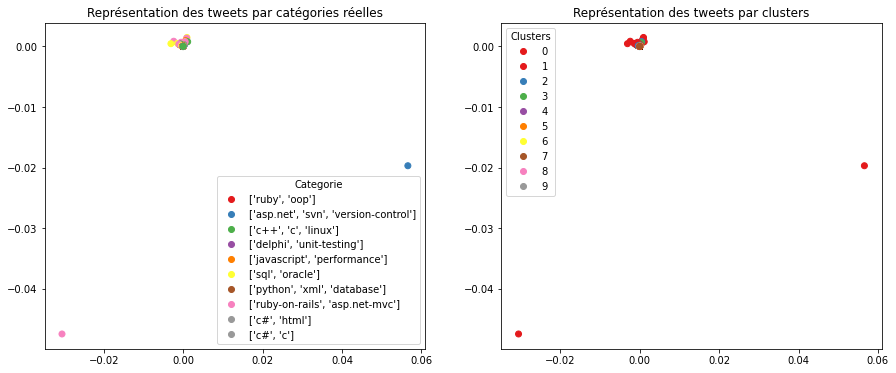

ARI :  -0.0009


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### USE

Fonction d'extraction des features avec USE

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 10
sentences = df_Title_Body['Document_DL'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Méthode supervisée OCR MAJ 23 mars

préparation des données pour l'extraction pour les modélisations avec les différentes méthodes

In [ ]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data_T['sentence_bow'] = data_T0['text'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T0['text'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T0['text'].apply(lambda x : transform_dl_fct(x))
data_T.shape

# Conclusion